In [1]:
!pip install ultralytics==8.0.28
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.6/272.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=a30c29a1c89bd12b63510bb9d83aece5ae8e802d0a23f9e7de0bc6c61db65860
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/

In [2]:
from ultralytics import YOLO
from IPython.display import display, Image

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/객체인식/model/yolo_damage_detection

/content/drive/.shortcut-targets-by-id/1EuKZvbY6kj5rgLSpCOGDWSyAU4mbYw9D/객체인식/model/yolo_damage_detection


In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/.shortcut-targets-by-id/1EuKZvbY6kj5rgLSpCOGDWSyAU4mbYw9D/객체인식/model/yolo_damage_detection


In [6]:
# Pip install method (recommended)

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.2/166.8 GB disk)


In [7]:
# model = YOLO(f'{HOME}/yolov8s-seg.pt')
# results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [ ]:
## autolabeled part
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="OAiSIIrcuWNys9BNqnQe")
project = rf.workspace("alpaco5-f3woi").project("part-autolabeld")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/drive/.shortcut-targets-by-id/1EuKZvbY6kj5rgLSpCOGDWSyAU4mbYw9D/객체인식/model/yolo_damage_detection/datasets’: File exists
/content/drive/.shortcut-targets-by-id/1EuKZvbY6kj5rgLSpCOGDWSyAU4mbYw9D/객체인식/model/yolo_damage_detection/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to part-autolabeld-1 in yolov8::  93%|█████████▎| 17619/19000 [02:15<00:09, 147.05it/s]

## Custom Training

In [ ]:
dataset.location

In [ ]:
%cd {HOME}

!yolo task=segment \
mode=train \
model = ./no_aug_epch15.pt \
data=./datasets/part-autolabeld-1/data.yaml \
epochs=15 \
imgsz=900 \
lr0 = 0.001

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    train_batch2.jpg
events.out.tfevents.1681692984.625536941d4c.3517.0  train_batch4160.jpg
results.csv					    train_batch4161.jpg
train_batch0.jpg				    train_batch4162.jpg
train_batch1.jpg				    weights


/content


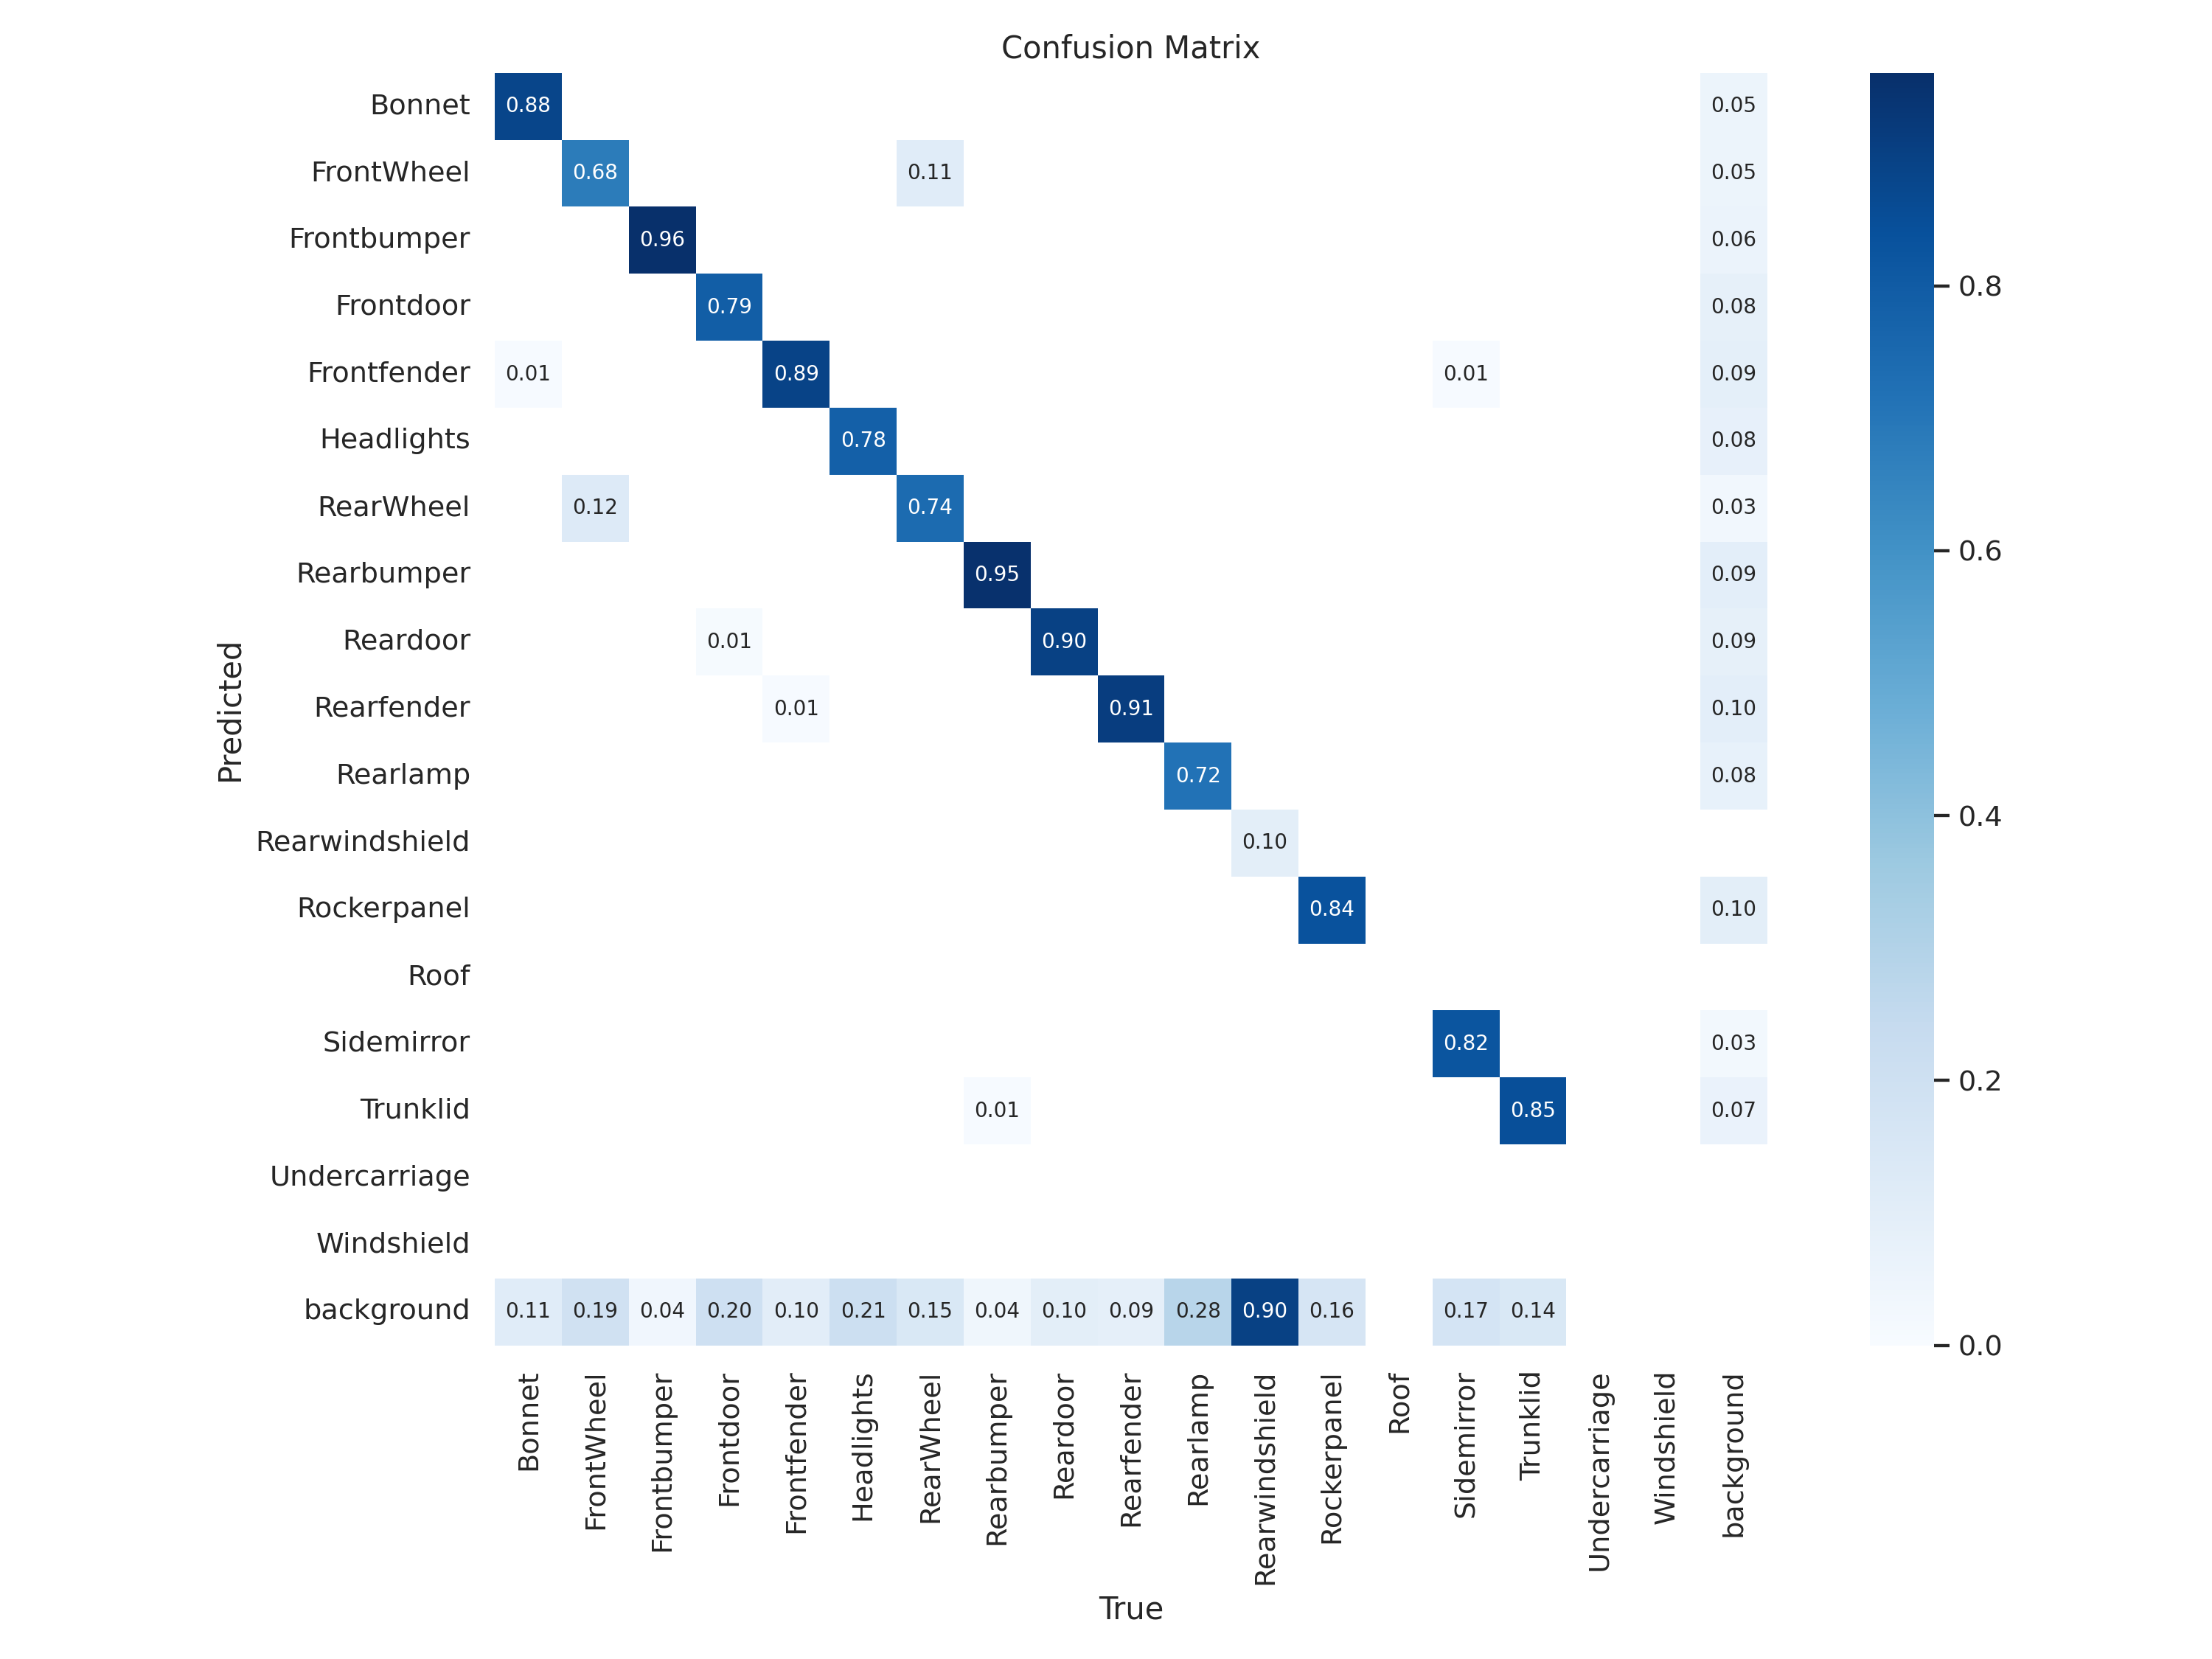

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


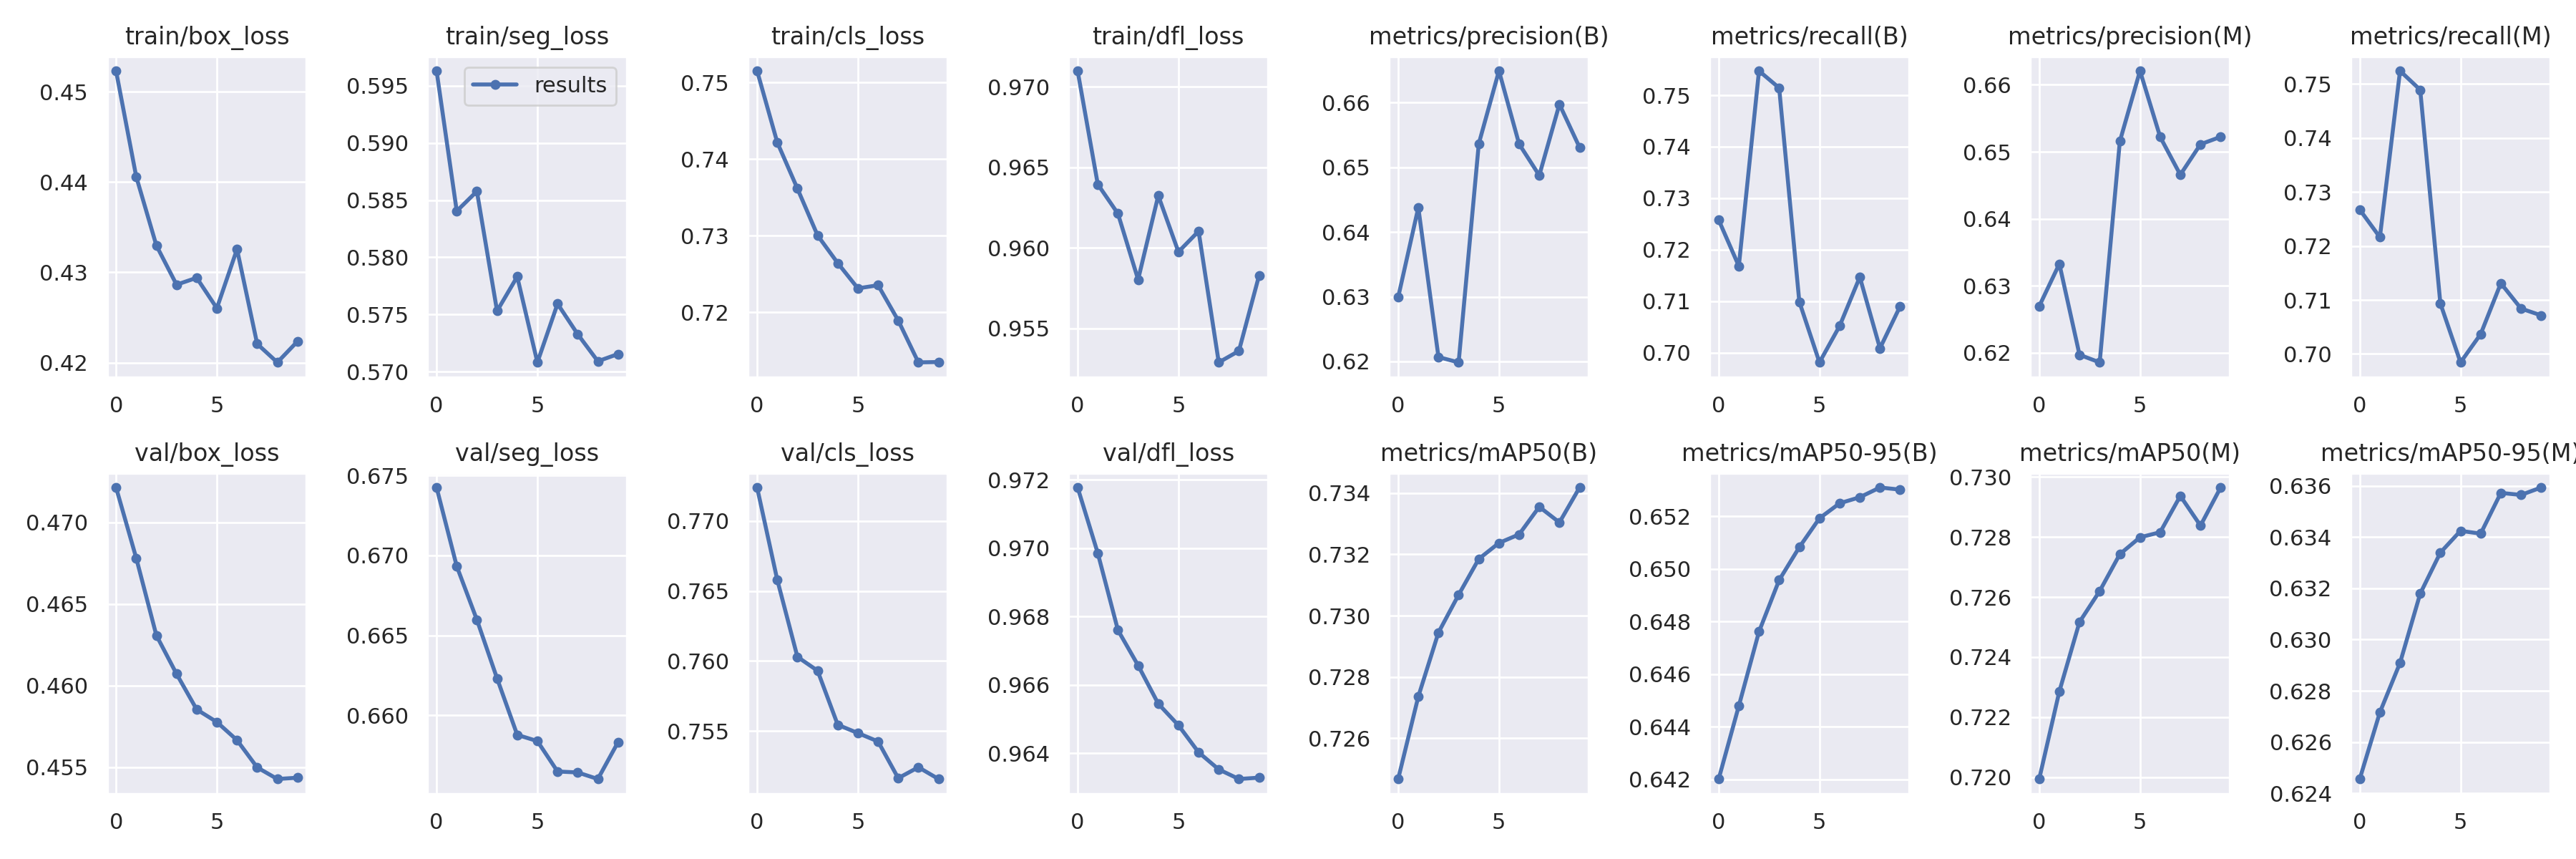

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


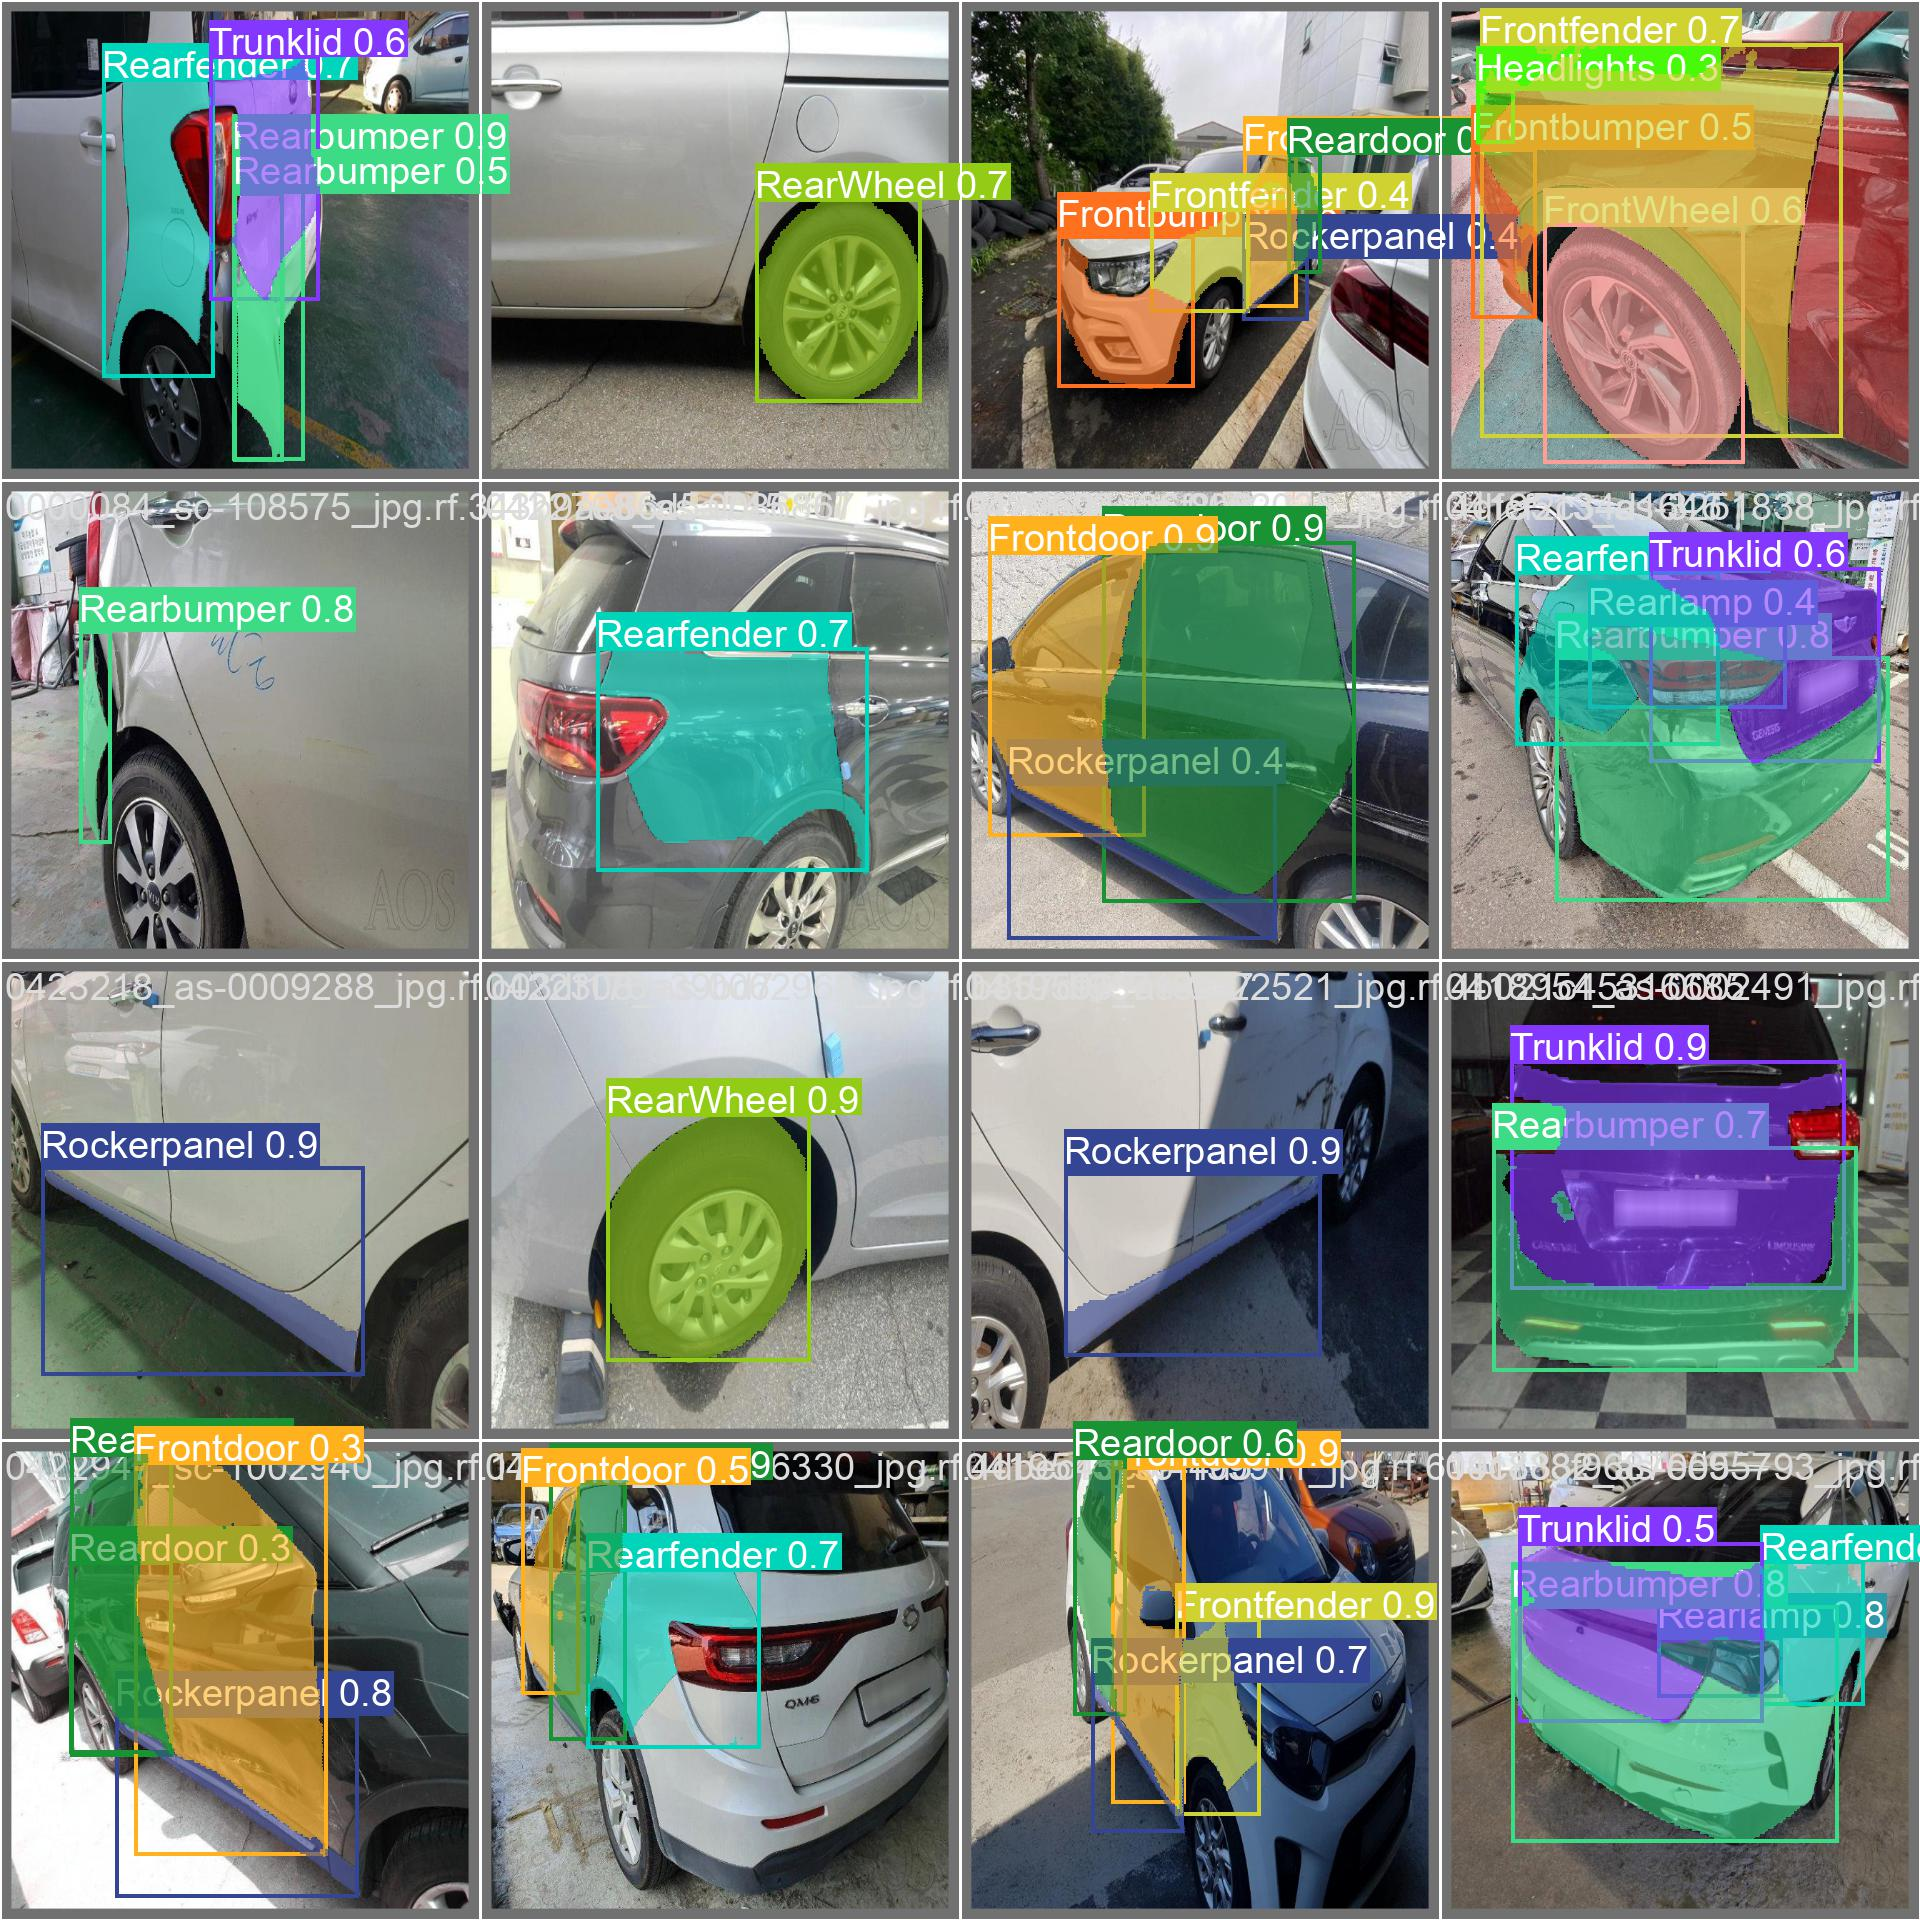

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment \
mode=val \
model=model \
data=/content/drive/MyDrive/객체인식/model/dh/datasets/car_part_segmentation_data-1/data.yaml

/content/drive/.shortcut-targets-by-id/1EuKZvbY6kj5rgLSpCOGDWSyAU4mbYw9D/객체인식/model/dh
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/cfg/__init__.py", line 243, in entrypoint
    model = YOLO(model)
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/engine/model.py", line 64, in __init__
    raise NotImplementedError(f"'{suffix}' model loading not implemented")
NotImplementedError: '' model loading not implemented
Sentry is attempting to send 2 pending error messages
Waiting up to 2 seconds
Press Ctrl-C to quit


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment \
mode=predict \
model={HOME}/best.pt \
conf=0.25 \
source= {dataset.location}/train/images \
save=true

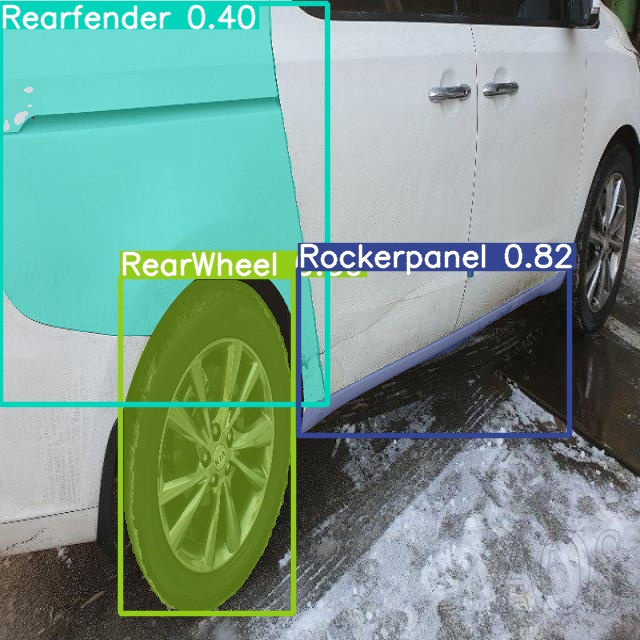

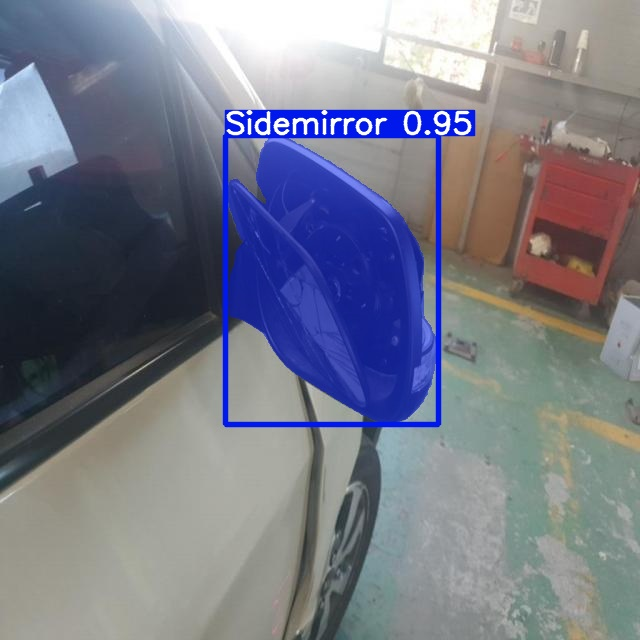

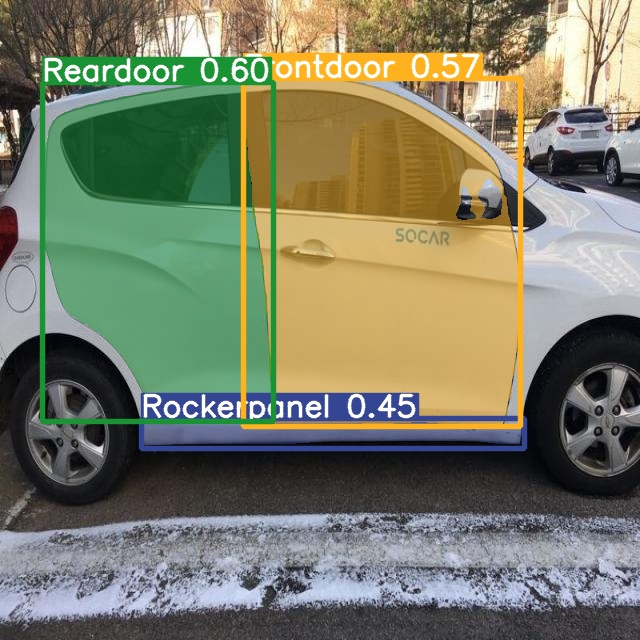

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.